In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist


In [2]:
shops = pd.read_excel('clustering.xlsx')

In [3]:
shops.head()

,Регион,Номер магазина,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,...,категория 29,категория 30,категория 31,Населенный пункт,Месторасположение,ТЦ,Точка притяжения,Парковка,Трафик,Витрины
0,г. Санкт-Петербург(офис: г. Санкт-Петербург),1,100,0.004,0.031,0.084,0.020,0.004,0.060,0.009,...,0.006,0.015,0.055,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто
1,г. Санкт-Петербург(офис: г. Санкт-Петербург),2,120,0.007,0.032,0.109,0.023,0.008,0.058,0.008,...,0.006,0.018,0.049,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,Во дворе с малой проходимостью,пусто
2,г. Санкт-Петербург(офис: г. Санкт-Петербург),5,80,0.004,0.034,0.092,0.017,0.004,0.059,0.010,...,0.007,0.014,0.049,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),Наличие витрин
3,г. Санкт-Петербург(офис: г. Санкт-Петербург),6,120,0.005,0.034,0.144,0.022,0.005,0.057,0.009,...,0.007,0.013,0.046,Город,Спальный район,"Локальный ТЦ (рядом жилой массив 500 м, мы явл...",Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто
4,г. Санкт-Петербург(офис: г. Санкт-Петербург),8,100,0.005,0.040,0.077,0.014,0.004,0.060,0.010,...,0.011,0.016,0.047,Город,Центр города,пусто,Гостиницы,пусто,Центральная улица,Наличие витрин


In [4]:
shops.columns

Index(['Регион', 'Номер магазина', 'Торговая площадь округл.', 'категория 1',
       'категория 2', 'категория 3', 'категория 4', 'категория 5',
       'категория 6', 'категория 7', 'категория 8', 'категория 9',
       'категория 10', 'категория 11', 'категория 12', 'категория 13',
       'категория 14', 'категория 15', 'категория 16', 'категория 17',
       'категория 18', 'категория 19', 'категория 20', 'категория 21',
       'категория 22', 'категория 23', 'категория 24', 'категория 25',
       'категория 26', 'категория 27', 'категория 28', 'категория 29',
       'категория 30', 'категория 31', 'Населенный пункт', 'Месторасположение',
       'ТЦ', 'Точка притяжения', 'Парковка', 'Трафик', 'Витрины '],
      dtype='object')

In [5]:
categorical_data_columns = ['Регион', 'Месторасположение', 'ТЦ', 'Точка притяжения', 'Парковка', 'Трафик', 'Витрины ']

In [6]:
numerical1_columns=['Торговая площадь округл.']

In [7]:
numerical2_columns=['категория 1',
       'категория 2', 'категория 3', 'категория 4', 'категория 5',
       'категория 6', 'категория 7', 'категория 8', 'категория 9',
       'категория 10', 'категория 11', 'категория 12', 'категория 13',
       'категория 14', 'категория 15', 'категория 16', 'категория 17',
       'категория 18', 'категория 19', 'категория 20', 'категория 21',
       'категория 22', 'категория 23', 'категория 24', 'категория 25',
       'категория 26', 'категория 27', 'категория 28', 'категория 29',
       'категория 30', 'категория 31']

In [8]:
numerical1_data = shops[numerical1_columns]

In [9]:
numerical2_data = shops[numerical2_columns]
numerical2_data = pd.DataFrame(StandardScaler().fit_transform(numerical2_data), columns=numerical2_columns)

In [10]:
train_data = numerical1_data.join(numerical2_data)

In [11]:
train_data.head()

,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,категория 8,категория 9,...,категория 22,категория 23,категория 24,категория 25,категория 26,категория 27,категория 28,категория 29,категория 30,категория 31
0,100,-1.209764,-0.399232,-1.225260,-0.609010,-1.139754,0.222163,0.436023,-0.540471,1.386869,...,0.498023,0.608778,0.282730,1.279344,1.717450,1.282702,1.759193,-0.790973,-0.636436,1.001697
1,120,0.761703,-0.249378,-0.381488,-0.224985,1.091854,-0.100687,-0.039638,0.116052,0.998467,...,-0.135861,0.075424,0.282730,-0.196249,-0.428008,-0.158134,0.089299,-0.790973,-0.159711,0.372725
2,80,-1.209764,0.050330,-0.955253,-0.993035,-1.139754,0.060738,0.911684,-0.671775,0.610066,...,-0.215096,-1.791314,0.282730,0.664513,0.859267,0.617701,0.089299,-0.150431,-0.795345,0.372725
3,120,-0.552608,0.050330,0.799794,-0.352993,-0.581852,-0.262111,0.436023,-0.934384,0.221664,...,-0.611274,-1.524638,-0.255544,-0.565147,0.430175,-0.158134,-1.285908,-0.150431,-0.954253,0.058238
4,100,-0.552608,0.949453,-1.461517,-1.377061,-1.139754,0.222163,0.911684,1.166488,0.610066,...,-0.135861,-1.791314,1.359278,1.402310,2.575634,0.506867,0.678674,2.411741,-0.477528,0.163067


In [12]:
categorical_data = shops[categorical_data_columns]

In [13]:
categorical_data.head()

,Регион,Месторасположение,ТЦ,Точка притяжения,Парковка,Трафик,Витрины
0,г. Санкт-Петербург(офис: г. Санкт-Петербург),Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто
1,г. Санкт-Петербург(офис: г. Санкт-Петербург),Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,Во дворе с малой проходимостью,пусто
2,г. Санкт-Петербург(офис: г. Санкт-Петербург),Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),Наличие витрин
3,г. Санкт-Петербург(офис: г. Санкт-Петербург),Спальный район,"Локальный ТЦ (рядом жилой массив 500 м, мы явл...",Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто
4,г. Санкт-Петербург(офис: г. Санкт-Петербург),Центр города,пусто,Гостиницы,пусто,Центральная улица,Наличие витрин


In [14]:
enc = OneHotEncoder()

In [15]:
categorial_transform = enc.fit_transform(categorical_data)

In [16]:
enc.categories_

[array(['Вологодская обл.(офис: Карелия респ.)',
        'Карелия респ.(офис: Карелия респ.)',
        'Ленинградская обл.(офис: г. Санкт-Петербург)',
        'Московская обл.(офис: Московская обл.)',
        'Мурманская обл.(офис: Мурманская обл.)',
        'Новгородская обл.(офис: Новгородская обл.)',
        'Псковская обл.(офис: Псковская обл.)',
        'Тверская обл.(офис: Псковская обл.)',
        'Ярославская обл.(офис: Ярославская обл.)',
        'г. Москва(офис: Московская обл.)',
        'г. Санкт-Петербург(офис: г. Санкт-Петербург)'], dtype=object),
 array(['Офисы (Бизнес-центр)', 'Спальный район', 'Торговый центр',
        'Центр города'], dtype=object),
 array(['Локальный ТЦ (рядом жилой массив 500 м, мы являемся точкой притяжения)',
        'ТЦ премиум (рядом может быть жилой массив, присутствует федеральный супермаркет, сам ТЦ-является точкой притяжения)',
        'Торгово- Развлекательный Комплекс районного масштаба', 'пусто'],
       dtype=object),
 array(['Банк, Почт

In [17]:
columns = []
for i in enc.categories_:
    for element in i:
        columns.append(element)

In [18]:
categorial_new = pd.DataFrame(categorial_transform.toarray(), columns=columns)
categorial_new = categorial_new.drop('пусто', axis = 1)

In [19]:
categorial_new.head()

,Вологодская обл.(офис: Карелия респ.),Карелия респ.(офис: Карелия респ.),Ленинградская обл.(офис: г. Санкт-Петербург),Московская обл.(офис: Московская обл.),Мурманская обл.(офис: Мурманская обл.),Новгородская обл.(офис: Новгородская обл.),Псковская обл.(офис: Псковская обл.),Тверская обл.(офис: Псковская обл.),Ярославская обл.(офис: Ярославская обл.),г. Москва(офис: Московская обл.),...,"Наличие общественных мест рядом с магазином (парк, фонтан, площадь где проводят праздники и т.д.)",Торговый центр,Учебные заведения,Наличие парковки,В шаговой доступности от жил массива (500 метров),Во дворе с малой проходимостью,На пересечении улиц,"Остановка общественного транспорта, в т.ч. метро",Центральная улица,Наличие витрин
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [20]:
shops_new = train_data.join(categorial_new)

In [21]:
shops_new.head()

,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,категория 8,категория 9,...,"Наличие общественных мест рядом с магазином (парк, фонтан, площадь где проводят праздники и т.д.)",Торговый центр,Учебные заведения,Наличие парковки,В шаговой доступности от жил массива (500 метров),Во дворе с малой проходимостью,На пересечении улиц,"Остановка общественного транспорта, в т.ч. метро",Центральная улица,Наличие витрин
0,100,-1.209764,-0.399232,-1.225260,-0.609010,-1.139754,0.222163,0.436023,-0.540471,1.386869,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,120,0.761703,-0.249378,-0.381488,-0.224985,1.091854,-0.100687,-0.039638,0.116052,0.998467,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,80,-1.209764,0.050330,-0.955253,-0.993035,-1.139754,0.060738,0.911684,-0.671775,0.610066,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,120,-0.552608,0.050330,0.799794,-0.352993,-0.581852,-0.262111,0.436023,-0.934384,0.221664,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,100,-0.552608,0.949453,-1.461517,-1.377061,-1.139754,0.222163,0.911684,1.166488,0.610066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [22]:
def dendograma(data):
    distance_mat = pdist(data)
    Z = hierarchy.linkage(distance_mat)
    plt.figure(figsize=(10, 5))
    dn = hierarchy.dendrogram(Z)

In [23]:
def PCA_scatter1(data):
    pca = decomposition.PCA(n_components=2)
    pca.fit(data)
    X_pca = pca.transform(data)
    plt.scatter(X_pca[:, 0], X_pca[:, 1])

In [24]:
def PCA_scatter2(data, y):
    pca = decomposition.PCA(n_components=2)
    pca.fit(data)
    X_pca = pca.transform(data)
    fig, ax = plt.subplots()
    f = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet')
    legend1 = ax.legend(*f.legend_elements(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.add_artist(legend1)
    return f.get_cmap()

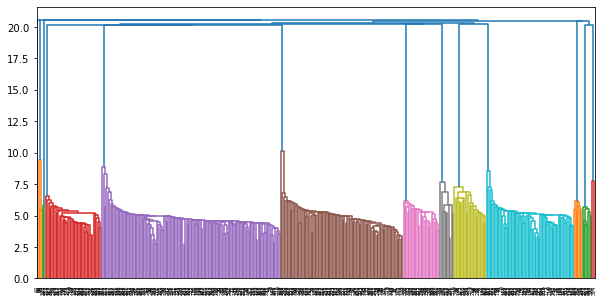

In [25]:
dendograma(shops_new)

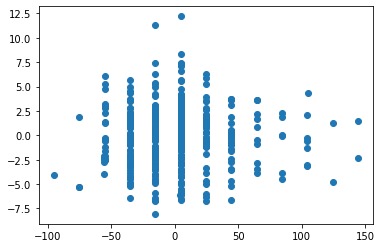

In [26]:
PCA_scatter1(shops_new)

На основе предствленой визуализации можем выделить 11 кластеров. На представленных данных лучше всего подойдет метод спектральной кластеризации. Но из интереса запустим еще три алгоритма кластеризации.

In [27]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
algorithms = []
result = []
algorithms.append(KMeans(n_clusters=11, random_state=0))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=11, random_state=0,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=11))
for algo in algorithms:
    result.append(algo.fit(shops_new))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


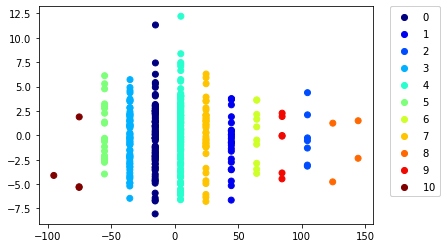

In [28]:
PCA_scatter2(shops_new, result[0].labels_)

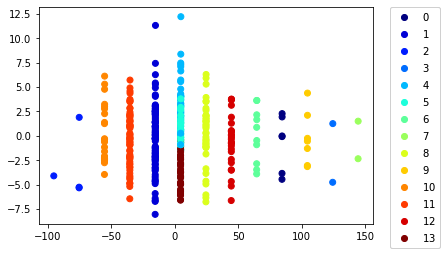

In [29]:
PCA_scatter2(shops_new, result[1].labels_)

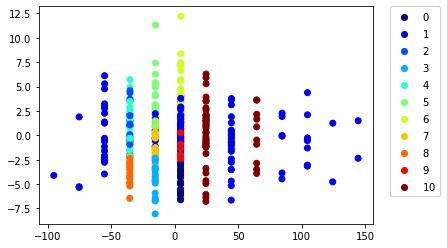

In [30]:
PCA_scatter2(shops_new, result[2].labels_)

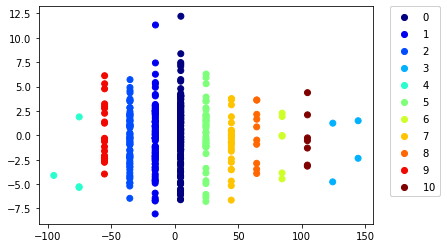

In [31]:
cl = PCA_scatter2(shops_new, result[3].labels_)

С предствленными данными для кластеризации лучше всего справляется метдо k-средних и спектральная кластеризация.
Тогда как affinity propagation и агломеративная кластеризация показывают странные результаты.

Давайте проинтерроетируем полученные значения. Для этого соединим матрицу меток с первоначальной матрицей.

In [32]:
label = pd.DataFrame(data=result[3].labels_,
          index=np.arange(0, len(result[3].labels_)),
          columns=np.arange(0, 1))
label.columns = ['label']

In [33]:
shops = shops.join(label)
shops.head()

,Регион,Номер магазина,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,...,категория 30,категория 31,Населенный пункт,Месторасположение,ТЦ,Точка притяжения,Парковка,Трафик,Витрины,label
0,г. Санкт-Петербург(офис: г. Санкт-Петербург),1,100,0.004,0.031,0.084,0.020,0.004,0.060,0.009,...,0.015,0.055,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,2
1,г. Санкт-Петербург(офис: г. Санкт-Петербург),2,120,0.007,0.032,0.109,0.023,0.008,0.058,0.008,...,0.018,0.049,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,Во дворе с малой проходимостью,пусто,1
2,г. Санкт-Петербург(офис: г. Санкт-Петербург),5,80,0.004,0.034,0.092,0.017,0.004,0.059,0.010,...,0.014,0.049,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),Наличие витрин,9
3,г. Санкт-Петербург(офис: г. Санкт-Петербург),6,120,0.005,0.034,0.144,0.022,0.005,0.057,0.009,...,0.013,0.046,Город,Спальный район,"Локальный ТЦ (рядом жилой массив 500 м, мы явл...",Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,1
4,г. Санкт-Петербург(офис: г. Санкт-Петербург),8,100,0.005,0.040,0.077,0.014,0.004,0.060,0.010,...,0.016,0.047,Город,Центр города,пусто,Гостиницы,пусто,Центральная улица,Наличие витрин,2


Посмотрим на крайние четыре точки справа.

In [34]:
shops[shops['label'].isin([3])]

,Регион,Номер магазина,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,...,категория 30,категория 31,Населенный пункт,Месторасположение,ТЦ,Точка притяжения,Парковка,Трафик,Витрины,label
87,г. Санкт-Петербург(офис: г. Санкт-Петербург),175,260,0.005,0.035,0.122,0.017,0.007,0.052,0.010,...,0.012,0.040,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,На пересечении улиц,Наличие витрин,3
228,Мурманская обл.(офис: Мурманская обл.),391,280,0.004,0.027,0.145,0.022,0.007,0.062,0.007,...,0.017,0.047,Город,Спальный район,пусто,"Банк, Почта, Аптека, Рынок, Мед. учреждения",Наличие парковки,Центральная улица,Наличие витрин,3
260,г. Санкт-Петербург(офис: г. Санкт-Петербург),437,280,0.006,0.037,0.158,0.025,0.009,0.056,0.010,...,0.014,0.034,Город,Спальный район,пусто,Торговый центр,Наличие парковки,В шаговой доступности от жил массива (500 метров),Наличие витрин,3
314,г. Санкт-Петербург(офис: г. Санкт-Петербург),512,260,0.006,0.033,0.077,0.018,0.006,0.060,0.008,...,0.018,0.055,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,3


Как можно видить эти магазины являются очень крупными магазинами в спальных районах доступные для большого количества машин из-за наличия парковки.

Также посмотрим на крайние точки слева

In [35]:
shops[shops['label'].isin([4])]

,Регион,Номер магазина,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,...,категория 30,категория 31,Населенный пункт,Месторасположение,ТЦ,Точка притяжения,Парковка,Трафик,Витрины,label
62,Мурманская обл.(офис: Мурманская обл.),119,40,0.005,0.024,0.089,0.020,0.007,0.062,0.006,...,0.032,0.060,Область,Центр города,пусто,Магазины стрит-ритейла продукты,Наличие парковки,Центральная улица,пусто,4
64,Мурманская обл.(офис: Мурманская обл.),123,60,0.004,0.021,0.090,0.022,0.005,0.067,0.005,...,0.033,0.065,Область,Центр города,Торгово- Развлекательный Комплекс районного ма...,Торговый центр,Наличие парковки,Центральная улица,Наличие витрин,4
68,Псковская обл.(офис: Псковская обл.),136,60,0.004,0.033,0.109,0.029,0.006,0.049,0.008,...,0.016,0.039,Город,Центр города,"Локальный ТЦ (рядом жилой массив 500 м, мы явл...",Наличие общественных мест рядом с магазином (п...,Наличие парковки,Центральная улица,пусто,4
78,Карелия респ.(офис: Карелия респ.),159,60,0.005,0.023,0.081,0.026,0.005,0.059,0.005,...,0.022,0.059,Город,Спальный район,пусто,Магазины стрит-ритейла продукты,Наличие парковки,В шаговой доступности от жил массива (500 метров),пусто,4


Эти магазины являются региональными центральными магазинами с хорошей доступностью и проходимостью